In [2]:
# Importing Libraries
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column', 50)
pd.set_option('display.max_rows', 100)

# Section (1): Data Set Preparation 

In [3]:
data = pd.read_csv('DataSet_FD7.CSV')

# Remove commas and spaces 
data['cost_amount'] = data['cost_amount'].str.replace(',', '').str.strip()  
data['ded_amount'] = data['ded_amount'].str.replace(',', '').str.strip()  
data['confirmed_amount'] = data['confirmed_amount'].str.replace(',', '').str.strip()  

# Convert the field type to numeric (float) and then to int
data['cost_amount'] = pd.to_numeric(data['cost_amount'], errors='coerce').fillna(0).astype(int)  
data['ded_amount'] = pd.to_numeric(data['ded_amount'], errors='coerce').fillna(0).astype(int)  
data['confirmed_amount'] = pd.to_numeric(data['confirmed_amount'], errors='coerce').fillna(0).astype(int)  
 

In [4]:
# Complete the missing records of provider name with the reference code and reference name
data['provider_name'] = data['provider_name'].fillna(data['ref_code'])  
data['provider_name'] = data['provider_name'].fillna(data['ref_name'])

specialties = pd.read_csv('specialties.csv')  # فایل تخصیص تخصص   

# ادغام دو DataFrame بر اساس ستون "service"  
merged_data = data.merge(specialties, on='Service', how='left')  

# Fill in the physician specialty field using merged data
data['provider_specialty'] = data['provider_specialty'].combine_first(merged_data['specialty'])   

In [5]:
from age_calculate_function import calculate_age

# Add an age column to the DataFrame
data['age'] = data['jalali_date'].apply(calculate_age) 

In [6]:
from shamsi_to_miladi_function import convert_to_gregorian
from add_one_month_function import add_one_month

# Convert admission date and confirmation date to Gregorian date format
data['Adm_date'] = data['Adm_date'].apply(convert_to_gregorian)  
data['confirm_date'] = data['confirm_date'].apply(convert_to_gregorian)  

# Fill in missing confirmation dates by add_one_month_function
data['confirm_date'] = data['confirm_date'].fillna(data['Adm_date'].apply(add_one_month))   

In [7]:
#Reset the empty confirmed value to zero
data['confirmed_amount'] = data['confirmed_amount'].fillna(0)  

# Add a new column numbered from 1 to 360925
data['record_id'] = range(1, len(data) + 1)  

# Convert date to datetime type
data['Adm_date'] = pd.to_datetime(data['Adm_date'])  

# Extract year and month
data['year_month'] = data['Adm_date'].dt.to_period('M') 

In [8]:
data.head()

,ID,jalali_date,gender,Adm_date,confirm_date,پوشش,Service,نوع صورتحساب,وضعیت پرونده,Unnamed: 9,ref_code,ref_name,ref_type,provider_name,provider_specialty,province,rgtr_deptmt,cost_amount,تعهد بیمه پایه,سهم بیمه تکمیلی,confirmed_amount,ded_amount,age,record_id,year_month
0,79222,1364/06/30,زن,2024-01-21,2024-04-13,خدمات آزمايشگاهي,آزمایشات تشخیصی پزشکی,مستقیم,تاييد حواله,سرپايي,NaN,پاتوبیولوژی دیدکتررضوانی,NaN,پاتوبیولوژی دیدکتررضوانی,پزشک عمومی / پاتولوژی,گیلان,واحد پذیرش اسناد خسارت درمان-نمایندگی نرگس نور...,11975000,0.0,"10,256,321",10256321,1718679,39,1,2024-01
1,18421,1353/02/03,زن,2024-01-21,2024-05-12,انواع ويزيت,ویزیت متخصص,مستقیم,تاييد حواله,سرپايي,NaN,لشنی,NaN,لشنی,پزشک عمومی,اصفهان,واحد پذیرش اسناد خسارت درمان-نمایندگی مهدی فرق...,1300000,0.0,"1,170,000",1170000,130000,51,2,2024-01
2,6825,1320/01/05,زن,2024-01-21,2024-03-12,خدمات اورژانس,پانسمان,مستقیم,تاييد حواله,سرپايي,NaN,مطب,NaN,حسینخان خسروخاور,دکترای حرفه‌ای پزشکی,مرکزی,واحد پذیرش اسناد خسارت درمان-نمایندگی الهه مهر...,20000000,0.0,"3,528,000",3528000,16472000,84,3,2024-01
3,108,1392/04/10,زن,2024-01-21,2024-04-16,انواع ويزيت,ویزیت فوق تخصصی,مستقیم,تاييد حواله,سرپايي,NaN,دکترقاسمی,NaN,دکترقاسمی,فوق تخصص مربوطه,کرمانشاه,واحد پذیرش اسناد خسارت درمان-نمایندگی صحرا سنج...,2200000,0.0,"1,720,000",1720000,480000,12,4,2024-01
4,26528,1391/10/10,مرد,2024-01-21,2024-03-26,دارو و ملزومات دارويي,دارو و ملزومات دارویی,مستقیم,تاييد حواله,سرپايي,NaN,مستقیم,NaN,محمد رضائی,فلوشیپ بیماری‌های ریه کودکان,تهران,واحد پذیرش اسناد خسارت درمان-دانشگاه آزاد اسلامی,4637000,0.0,"4,495,450",4495450,141550,12,5,2024-01


# Section (2): Feature Extraction (Definition)

Frequency Ratio

## [Ftr_1] Ratio of total number of providers (prescriptions) to total number of unique providers for patient i in month t per prescription
## for each i

In [9]:
## total number of providers per month for each patient per prescription 

# تبدیل تاریخ به نوع datetime  
data['Adm_date'] = pd.to_datetime(data['Adm_date'])  

# استخراج سال و ماه  
data['year_month'] = data['Adm_date'].dt.to_period('M') 

#total number of providers per month for each patient per prescription
providers_count_per_month = data.groupby(['year_month', 'ID']).agg(  
    total_providers_monthly=('provider_name', 'count')    
).reset_index()  

# ادغام اطلاعات بیماران با DataFrame اصلی  
data = data.merge(providers_count_per_month, on=['year_month', 'ID'], how='left')   

#total number of unique providers per month for each patient per prescription
unique_providers_per_month = data.groupby(['year_month', 'ID']).agg(  
    unique_providers=('provider_name', 'nunique')  # تعداد پزشکان منحصر به فرد  
).reset_index()  

# ادغام اطلاعات منحصر به فرد بیماران با DataFrame اصلی  
data = data.merge(unique_providers_per_month, on=['year_month', 'ID'], how='left')  

data['unq_ratio_provider']= data['total_providers_monthly'] / data ['unique_providers']

In [10]:
print(data.loc[0:10, ['ID', 'unique_providers', 'total_providers_monthly', 'unq_ratio_provider']])  

max_value5 = data['unq_ratio_provider'].max()
print(max_value5)

       ID  unique_providers  total_providers_monthly  unq_ratio_provider
0   79222                 4                        5            1.250000
1   18421                 8                       20            2.500000
2    6825                 3                        7            2.333333
3     108                 2                        2            1.000000
4   26528                 1                        2            2.000000
5   18421                 8                       20            2.500000
6   48928                 3                        5            1.666667
7   23942                 2                        2            1.000000
8   17369                 2                        3            1.500000
9   42920                 3                        4            1.333333
10  50183                 4                        4            1.000000
16.0


## [Ftr_2] Ratio of total number of patients (prescriptions) to total number of unique patients in month t for provider j in each prescription
## for each j

In [11]:
## total number of providers per month for each patient per prescription

#total number of patients per month for each providers per prescription
patients_count_per_month = data.groupby(['year_month', 'provider_name']).agg(  
    total_patients_monthly=('ID', 'count')  # تعداد کل بیماران  
).reset_index()  

# ادغام اطلاعات بیماران با DataFrame اصلی  
data = data.merge(patients_count_per_month, on=['year_month', 'provider_name'], how='left') 

#total number of unique patients per month for each providers per prescription
unique_patients_per_month = data.groupby(['year_month', 'provider_name']).agg(  
    unique_patients=('ID', 'nunique')  # تعداد پزشکان منحصر به فرد  
).reset_index()  

# ادغام اطلاعات منحصر به فرد بیماران با DataFrame اصلی  
data = data.merge(unique_patients_per_month, on=['year_month', 'provider_name'], how='left')

data['unq_ratio_patient']= data['total_patients_monthly'] / data ['unique_patients']

In [12]:
print(data.loc[200235:200245, ['ID', 'unique_patients', 'total_patients_monthly', 'unq_ratio_patient']])  

           ID  unique_patients  total_patients_monthly  unq_ratio_patient
200235  22737                1                       1           1.000000
200236  33411                1                       1           1.000000
200237  15106               11                      13           1.181818
200238  54596                1                       1           1.000000
200239   8629                2                       6           3.000000
200240  81331               11                      16           1.454545
200241    651                1                       2           2.000000
200242  21999              578                    1166           2.017301
200243    815                1                       2           2.000000
200244  42544                1                       1           1.000000
200245  81474                3                       3           1.000000


## Rial Ratios

# [Ftr_3] Decrease percentage in the average cost of prescriptions of provider j  in month t compared to the average cost of prescriptions of provider j in month t-1 in each prescriptions
# for each j

In [13]:
# محاسبه میانگین مبلغ نسخه‌ها برای هر پزشک در هر ماه  
monthly_means = data.groupby(['year_month', 'provider_name']).agg(mean_amount_provider=('cost_amount', 'mean')).reset_index()  

# محاسبه درصد تغییر از ماه گذشته  
monthly_means['previous_mean_amount_provider_1'] = monthly_means.groupby('provider_name')['mean_amount_provider'].shift(1)
monthly_means['previous_mean_amount_provider_2'] = monthly_means.groupby('provider_name')['mean_amount_provider'].shift(2)

monthly_means['average_previous_mean_provider'] = monthly_means[['previous_mean_amount_provider_1', 'previous_mean_amount_provider_2']].mean(axis=1)  

monthly_means['percent_change_provider'] = ((monthly_means['mean_amount_provider'] - monthly_means['average_previous_mean_provider']) / monthly_means['average_previous_mean_provider']) * 100  

# ادغام نتایج با DataFrame اصلی  
data = data.merge(monthly_means, on=['year_month', 'provider_name'], how='left', suffixes=('', '_monthly'))
data['percent_change_provider'] = data['percent_change_provider'].apply(lambda x: 0 if (pd.isna(x) or x < 0 or x > 2000) else x)  


In [14]:
print(data.loc[310335:310346, ['Adm_date', 'average_previous_mean_provider', 'mean_amount_provider', 'percent_change_provider']])  


         Adm_date  average_previous_mean_provider  mean_amount_provider  \
310335 2024-12-04                    6.114423e+06          9.148702e+06   
310336 2024-12-04                    1.492833e+06          1.181180e+06   
310337 2024-12-04                    1.500000e+06          1.098850e+06   
310338 2024-12-04                    3.240762e+06          2.225850e+06   
310339 2024-12-04                             NaN          1.602150e+07   
310340 2024-12-04                    3.651674e+06          2.855355e+06   
310341 2024-12-04                    1.329199e+07          6.955826e+06   
310342 2024-12-04                             NaN          2.729000e+06   
310343 2024-12-04                    2.742595e+07          9.387112e+06   
310344 2024-12-04                    4.175287e+06          7.596250e+06   
310345 2024-12-04                    6.417042e+06          5.299005e+06   
310346 2024-12-04                    5.660865e+06          8.159502e+06   

        percent_change_p

# [Ftr_4] Increase percentage in the average cost of prescriptions of patient i in month t in prescription k compared to the average cost of prescriptions of patient i in month t-1 in prescription k
## for each i

In [15]:
 # محاسبه میانگین مبلغ نسخه‌ها برای هر بیمار در هر ماه  
monthly_means = data.groupby(['year_month', 'ID']).agg(mean_amount_patient=('cost_amount', 'mean')).reset_index()  

# محاسبه درصد تغییر از ماه گذشته  
monthly_means['previous_mean_amount_patient_1'] = monthly_means.groupby('ID')['mean_amount_patient'].shift(1)
monthly_means['previous_mean_amount_patient_2'] = monthly_means.groupby('ID')['mean_amount_patient'].shift(2)

monthly_means['average_previous_mean_patient'] = monthly_means[['previous_mean_amount_patient_1', 'previous_mean_amount_patient_2']].mean(axis=1)  

monthly_means['percent_change_patient'] = ((monthly_means['mean_amount_patient'] - monthly_means['average_previous_mean_patient']) / monthly_means['average_previous_mean_patient']) * 100  

# ادغام نتایج با DataFrame اصلی  
data = data.merge(monthly_means, on=['year_month', 'ID'], how='left', suffixes=('', '_monthly'))

data['percent_change_patient'] = data['percent_change_patient'].apply(lambda x: 0 if (pd.isna(x) or x < 0 or x > 2000) else x)  


In [16]:

print(data.loc[310335:310346, ['ID', 'Adm_date', 'cost_amount', 'average_previous_mean_patient', 'mean_amount_patient', 'percent_change_patient']])  


           ID   Adm_date  cost_amount  average_previous_mean_patient  \
310335  81149 2024-12-04       530000                            NaN   
310336  24996 2024-12-04      2200000                   4.850298e+07   
310337  61590 2024-12-04      1098850                   1.895877e+06   
310338  47533 2024-12-04      2041200                   2.415219e+06   
310339  79354 2024-12-04     16021500                   5.383699e+06   
310340  62555 2024-12-04      3820710                   1.736467e+06   
310341  79549 2024-12-04      6955826                   4.105432e+06   
310342   8387 2024-12-04      1573500                   9.405833e+06   
310343  60644 2024-12-04      2428633                   5.035168e+06   
310344  27971 2024-12-04      2152795                   1.600000e+07   
310345  81142 2024-12-04      3000000                   2.468698e+06   
310346  22884 2024-12-04      4440000                   2.820833e+06   

        mean_amount_patient  percent_change_patient  
310335   

## [Ftr_5] Increase percentage in the cost of service s in month t compared to the average cost of service s in month t in each medical prescription
# # T(i,j,s,k,t) for each j

In [17]:
 
# محاسبه میانگین مبلغ هر خدمت در هر ماه  
monthly_avg = data.groupby(['year_month', 'Service']).agg(avg_amount=('cost_amount', 'mean')).reset_index()

# ادغام میانگین‌ها با DataFrame اصلی  
data = data.merge(monthly_avg, on=['year_month', 'Service'], how='left', suffixes=('', '_monthly'))  

# محاسبه درصد اختلاف مبلغ هر خدمت در هر نسخه نسبت به میانگین  
data['percent_difference'] = ((data['cost_amount'] - data['avg_amount']) / data['avg_amount']) * 100  

# صفر کردن مقادیر مربوط به خدمت "Ultrasound"  
data.loc[data['Service'] == 'دارو و ملزومات دارویی', 'percent_difference'] = 0  
data['percent_difference'] = data['percent_difference'].apply(lambda x: 0 if (pd.isna(x) or x < 0) else x) 

In [18]:
 print(data.loc[240200:240211, ['record_id', 'Adm_date', 'avg_amount', 'cost_amount', 'percent_difference']])  

        record_id   Adm_date    avg_amount  cost_amount  percent_difference
240200     240201 2024-09-26  2.531076e+06      2410000            0.000000
240201     240202 2024-09-26  2.982891e+06      4435996           48.714638
240202     240203 2024-09-26  2.994196e+06      1560850            0.000000
240203     240204 2024-09-26  1.286990e+06      1550000           20.436097
240204     240205 2024-09-26  1.921195e+06      1500000            0.000000
240205     240206 2024-09-26  2.994196e+06      8474000            0.000000
240206     240207 2024-09-26  2.982891e+06      2556050            0.000000
240207     240208 2024-09-26  2.994196e+06      7552000            0.000000
240208     240209 2024-09-26  2.994196e+06       502870            0.000000
240209     240210 2024-09-26  9.927434e+06       200000            0.000000
240210     240211 2024-09-26  1.921195e+06      1500000            0.000000
240211     240212 2024-09-26  2.994196e+06       240400            0.000000


# [Ftr_6_1] Percentage increase in the average cost of service s in month t for provider j in prescription k compared to the average cost of service s in month t-1
# T(i,j,s,k,t) for j

In [19]:

# محاسبه میانگین مبلغ هر خدمت برای هر پزشک در هر ماه  
monthly_avg_per_provider = data.groupby(['year_month', 'provider_name', 'Service']).agg(avg_amount_ser=('cost_amount', 'mean')).reset_index()  

# محاسبه میانگین مبلغ هر خدمت در هر ماه  
monthly_avg_overall = data.groupby(['year_month', 'Service']).agg(overall_avg_amount_ser=('cost_amount', 'mean')).reset_index()  

# محاسبه میانگین ماه قبل برای هر خدمت  
monthly_avg_overall['prev_avg_amount_serv'] = monthly_avg_overall.groupby('Service')['overall_avg_amount_ser'].shift(1)  

# ادغام نتایج با DataFrame اصلی  
data = data.merge(monthly_avg_per_provider[['year_month', 'provider_name', 'Service', 'avg_amount_ser']],   
               on=['year_month', 'provider_name', 'Service'],   
               how='left', suffixes=('', '_provider'))  

data = data.merge(monthly_avg_overall[['year_month', 'Service', 'prev_avg_amount_serv']],   
               on=['year_month', 'Service'],   
               how='left')

# محاسبه درصد اختلاف  
data['percent_diff_ser'] = ((data['avg_amount_ser'] - data['prev_avg_amount_serv']) / data['prev_avg_amount_serv']) * 100  

data.loc[data['Service'] == 'دارو و ملزومات دارویی', 'percent_diff_ser'] = 0
data['percent_diff_ser'] = data['percent_diff_ser'].apply(lambda x: 0 if (pd.isna(x) or x < 0) else x) 

In [20]:
print(data.loc[240200:240211, ['cost_amount', 'avg_amount_ser','prev_avg_amount_serv', 'percent_diff_ser']])  

        cost_amount  avg_amount_ser  prev_avg_amount_serv  percent_diff_ser
240200      2410000    2.410000e+06          2.470553e+06          0.000000
240201      4435996    4.435996e+06          2.995138e+06         48.106564
240202      1560850    2.812884e+06          3.252655e+06          0.000000
240203      1550000    1.533333e+06          1.295728e+06         18.337637
240204      1500000    2.253477e+06          1.880196e+06         19.853325
240205      8474000    2.812884e+06          3.252655e+06          0.000000
240206      2556050    2.556050e+06          2.995138e+06          0.000000
240207      7552000    7.552000e+06          3.252655e+06          0.000000
240208       502870    4.420849e+06          3.252655e+06          0.000000
240209       200000    2.000000e+05          1.338585e+07          0.000000
240210      1500000    2.333333e+06          1.880196e+06         24.100569
240211       240400    2.404000e+05          3.252655e+06          0.000000


# [Ftr_7_1] Percentage increase in the average cost of specialty s for provider j in month t in prescription k compared to the average amount of specialty s in month t-1
# T(i,j,s,k,t) beza j

In [21]:
# محاسبه میانگین مبلغ هر تخصص برای هر پزشک در هر ماه  
monthly_avg_per_provider_spe = data.groupby(['year_month', 'provider_name', 'provider_specialty']).agg(avg_amount_spe=('cost_amount', 'mean')).reset_index()  

# محاسبه میانگین مبلغ هر خدمت در هر ماه  
monthly_avg_overall_spe = data.groupby(['year_month', 'provider_specialty']).agg(overall_avg_amount_spe=('cost_amount', 'mean')).reset_index()  

# محاسبه میانگین ماه قبل برای هر خدمت  
monthly_avg_overall_spe['prev_avg_amount_spe'] = monthly_avg_overall_spe.groupby('provider_specialty')['overall_avg_amount_spe'].shift(1)  

# ادغام نتایج با DataFrame اصلی  
data = data.merge(monthly_avg_per_provider_spe[['year_month', 'provider_name', 'provider_specialty', 'avg_amount_spe']],   
               on=['year_month', 'provider_name', 'provider_specialty'],   
               how='left', suffixes=('', '_provider'))  

data = data.merge(monthly_avg_overall_spe[['year_month', 'provider_specialty', 'prev_avg_amount_spe']],   
               on=['year_month', 'provider_specialty'],   
               how='left')

# محاسبه درصد اختلاف  
data['percent_diff_spe'] = ((data['avg_amount_spe'] - data['prev_avg_amount_spe']) / data['prev_avg_amount_spe']) * 100  

data['percent_diff_spe'] = data['percent_diff_spe'].apply(lambda x: 0 if (pd.isna(x) or x < 0) else x) 


In [22]:
print(data.loc[240200:240211, ['avg_amount_spe','prev_avg_amount_spe', 'percent_diff_spe']]) 

        avg_amount_spe  prev_avg_amount_spe  percent_diff_spe
240200    2.410000e+06         1.350560e+06         78.444497
240201    4.435996e+06         1.093139e+07          0.000000
240202    5.474557e+06         5.888791e+06          0.000000
240203    2.012473e+06         2.071247e+06          0.000000
240204    1.940341e+06         2.071247e+06          0.000000
240205    5.474557e+06         5.888791e+06          0.000000
240206    2.556050e+06         3.311670e+07          0.000000
240207    7.552000e+06         3.255359e+06        131.986722
240208    4.420849e+06         3.255359e+06         35.802217
240209    9.925000e+05         2.071247e+06          0.000000
240210    2.333333e+06         2.071247e+06         12.653572
240211    8.447000e+05         5.888791e+06          0.000000


# [Ftr_7_2] Percentage increase in the  cost of specialty s for provider j in month t in prescription k compared to the average amount of specialty s in month t-1
# T(i,j,s,k,t) beza j

In [23]:
# محاسبه درصد اختلاف  
data['percent_diff_spe2'] = ((data['cost_amount'] - data['prev_avg_amount_spe']) / data['prev_avg_amount_spe']) * 100 

data['percent_diff_spe2'] = data['percent_diff_spe2'].apply(lambda x: 0 if (pd.isna(x) or x < 0) else x) 

In [24]:
print(data.loc[240200:240211, ['cost_amount','prev_avg_amount_spe', 'percent_diff_spe2']])  

        cost_amount  prev_avg_amount_spe  percent_diff_spe2
240200      2410000         1.350560e+06          78.444497
240201      4435996         1.093139e+07           0.000000
240202      1560850         5.888791e+06           0.000000
240203      1550000         2.071247e+06           0.000000
240204      1500000         2.071247e+06           0.000000
240205      8474000         5.888791e+06          43.900509
240206      2556050         3.311670e+07           0.000000
240207      7552000         3.255359e+06         131.986722
240208       502870         3.255359e+06           0.000000
240209       200000         2.071247e+06           0.000000
240210      1500000         2.071247e+06           0.000000
240211       240400         5.888791e+06           0.000000


# [Ftr_8_1] Percentage increase in the average cost of service s in month t for patient j in prescription k compared to the average amount of service s in month t-1
# T(i,j,s,k,t) for each i

In [25]:
# محاسبه میانگین مبلغ هر خدمت برای هر بیمار در هر ماه  
monthly_avg_per_patient = data.groupby(['year_month', 'ID', 'Service']).agg(avg_amount_ser_patient=('cost_amount', 'mean')).reset_index()  

# محاسبه میانگین مبلغ هر خدمت در هر ماه  
monthly_avg_overall_patient = data.groupby(['year_month', 'Service']).agg(overall_avg_amount_ser_patient=('cost_amount', 'mean')).reset_index()  

# محاسبه میانگین ماه قبل برای هر خدمت  
monthly_avg_overall_patient['prev_avg_amount_serv_patient'] = monthly_avg_overall_patient.groupby('Service')['overall_avg_amount_ser_patient'].shift(1)  

# ادغام نتایج با DataFrame اصلی  
data = data.merge(monthly_avg_per_patient[['year_month', 'ID', 'Service', 'avg_amount_ser_patient']],   
               on=['year_month', 'ID', 'Service'],   
               how='left', suffixes=('', '_patient'))  

data = data.merge(monthly_avg_overall_patient[['year_month', 'Service', 'prev_avg_amount_serv_patient']],   
               on=['year_month', 'Service'],   
               how='left')

# محاسبه درصد اختلاف  
data['percent_diff_ser_patient'] = ((data['avg_amount_ser_patient'] - data['prev_avg_amount_serv_patient']) / data['prev_avg_amount_serv_patient']) * 100  

data.loc[data['Service'] == 'دارو و ملزومات دارویی', 'percent_diff_ser_patient'] = 0 

data['percent_diff_ser_patient'] = data['percent_diff_ser_patient'].apply(lambda x: 0 if (pd.isna(x) or x < 0) else x) 

In [26]:
print(data.loc[240200:240211, ['cost_amount', 'avg_amount_ser_patient','prev_avg_amount_serv_patient', 'percent_diff_ser_patient']])  


        cost_amount  avg_amount_ser_patient  prev_avg_amount_serv_patient  \
240200      2410000               2410000.0                  2.470553e+06   
240201      4435996               4435996.0                  2.995138e+06   
240202      1560850               2035030.0                  3.252655e+06   
240203      1550000               1550000.0                  1.295728e+06   
240204      1500000               1500000.0                  1.880196e+06   
240205      8474000               8474000.0                  3.252655e+06   
240206      2556050               2556050.0                  2.995138e+06   
240207      7552000               7552000.0                  3.252655e+06   
240208       502870               1111017.0                  3.252655e+06   
240209       200000                200000.0                  1.338585e+07   
240210      1500000               1500000.0                  1.880196e+06   
240211       240400                240400.0                  3.252655e+06   

# [Ftr_8_2] Percentage increase in the cost of service s in month t in prescription k compared to the average cost of service s in month t-1
# T(i,j,s,k,t) for each j

In [27]:
# محاسبه میانگین مبلغ هر خدمت در هر ماه  
monthly_avg_overall = data.groupby(['year_month', 'Service']).agg(overall_avg_amount_ser=('cost_amount', 'mean')).reset_index()  

# محاسبه میانگین ماه قبل برای هر خدمت  
monthly_avg_overall['prev_avg_amount_ser'] = monthly_avg_overall.groupby('Service')['overall_avg_amount_ser'].shift(1)  

# ادغام نتایج با DataFrame اصلی   
data = data.merge(monthly_avg_overall[['year_month', 'Service', 'prev_avg_amount_ser']],   
               on=['year_month', 'Service'],   
               how='left') 

# محاسبه درصد اختلاف  
data['percent_diff_serv'] = ((data['cost_amount'] - data['prev_avg_amount_ser']) / data['prev_avg_amount_ser']) * 100 

# صفر کردن مقادیر مربوط به خدمت "Ultrasound"  
data.loc[data['Service'] == 'دارو و ملزومات دارویی', 'percent_diff_serv'] = 0 

data['percent_diff_serv'] = data['percent_diff_serv'].apply(lambda x: 0 if (pd.isna(x) or x < 0) else x) 

In [28]:
print(data.loc[240200:240211, ['cost_amount', 'prev_avg_amount_ser', 'percent_diff_serv']])  

        cost_amount  prev_avg_amount_ser  percent_diff_serv
240200      2410000         2.470553e+06           0.000000
240201      4435996         2.995138e+06          48.106564
240202      1560850         3.252655e+06           0.000000
240203      1550000         1.295728e+06          19.623915
240204      1500000         1.880196e+06           0.000000
240205      8474000         3.252655e+06           0.000000
240206      2556050         2.995138e+06           0.000000
240207      7552000         3.252655e+06           0.000000
240208       502870         3.252655e+06           0.000000
240209       200000         1.338585e+07           0.000000
240210      1500000         1.880196e+06           0.000000
240211       240400         3.252655e+06           0.000000


# [9] Ratio of number of the service s to number of prescriptions for provider j in prescription k

In [29]:
# محاسبه تعداد خدمات برای هر پزشک  
provider_service_count = data.groupby(['provider_name', 'Service']).size().reset_index(name='Count')  

# محاسبه تعداد کل نسخه های برای هر پزشک  
provider_count = data['provider_name'].value_counts().reset_index()  
provider_count.columns = ['provider_name', 'TotalCount']  

# ادغام تعداد کل خدمات با تعداد خدمات برای هر پزشک  
merged = pd.merge(provider_service_count, provider_count, on='provider_name')  

# محاسبه نسبت خدمات نسبت به کل   
merged['Ratio'] = 1 - (merged['Count'] / merged['TotalCount'])

merged.loc[merged['TotalCount'] == 1, 'Ratio'] = 0  

# ادغام نتایج به DataFrame اصلی براساس Specialty و Service  
#data = pd.merge(data, merged[['provider_name', 'Service', 'Count', 'TotalCount', 'Ratio']], on=['provider_name', 'Service'], how='left')  
data = pd.merge(
    data,
    merged[['provider_name', 'Service', 'Ratio']],  # فقط ستون‌های مورد نیاز
    on=['provider_name', 'Service'],
    how='left'
)

In [30]:
print(data.loc[352785: , ['Ratio']])  

           Ratio
352785  0.692308
352786  0.994943
352787  0.500000
352788  0.571429
352789  0.000000
...          ...
360919  0.948718
360920  0.881110
360921  0.961538
360922  0.500000
360923  0.000000

[8139 rows x 1 columns]


In [105]:
data.head()

,ID,jalali_date,gender,Adm_date,confirm_date,پوشش,Service,نوع صورتحساب,وضعیت پرونده,Unnamed: 9,ref_code,ref_name,ref_type,provider_name,provider_specialty,province,rgtr_deptmt,cost_amount,تعهد بیمه پایه,سهم بیمه تکمیلی,confirmed_amount,ded_amount,age,record_id,year_month,...,mean_amount_provider,previous_mean_amount_provider_1,previous_mean_amount_provider_2,average_previous_mean_provider,percent_change_provider,mean_amount_patient,previous_mean_amount_patient_1,previous_mean_amount_patient_2,average_previous_mean_patient,percent_change_patient,avg_amount,percent_difference,avg_amount_ser,prev_avg_amount_serv,percent_diff_ser,avg_amount_spe,prev_avg_amount_spe,percent_diff_spe,percent_diff_spe2,avg_amount_ser_patient,prev_avg_amount_serv_patient,percent_diff_ser_patient,prev_avg_amount_ser,percent_diff_serv,Ratio
0,79222,1364/06/30,زن,2024-01-21,2024-04-13,خدمات آزمايشگاهي,آزمایشات تشخیصی پزشکی,مستقیم,تاييد حواله,سرپايي,NaN,پاتوبیولوژی دیدکتررضوانی,NaN,پاتوبیولوژی دیدکتررضوانی,پزشک عمومی / پاتولوژی,گیلان,واحد پذیرش اسناد خسارت درمان-نمایندگی نرگس نور...,11975000,0.0,"10,256,321",10256321,1718679,39,1,2024-01,...,1.197500e+07,NaN,NaN,NaN,0.0,4.672110e+06,NaN,NaN,NaN,0.0,5.791916e+06,106.753689,11975000.0,NaN,0.0,1.197500e+07,NaN,0.0,0.0,11975000.0,NaN,0.0,NaN,0.0,0.000000
1,18421,1353/02/03,زن,2024-01-21,2024-05-12,انواع ويزيت,ویزیت متخصص,مستقیم,تاييد حواله,سرپايي,NaN,لشنی,NaN,لشنی,پزشک عمومی,اصفهان,واحد پذیرش اسناد خسارت درمان-نمایندگی مهدی فرق...,1300000,0.0,"1,170,000",1170000,130000,51,2,2024-01,...,1.300000e+06,NaN,NaN,NaN,0.0,4.171610e+06,NaN,NaN,NaN,0.0,1.405654e+06,0.000000,1300000.0,NaN,0.0,1.300000e+06,NaN,0.0,0.0,1400000.0,NaN,0.0,NaN,0.0,0.000000
2,6825,1320/01/05,زن,2024-01-21,2024-03-12,خدمات اورژانس,پانسمان,مستقیم,تاييد حواله,سرپايي,NaN,مطب,NaN,حسینخان خسروخاور,دکترای حرفه‌ای پزشکی,مرکزی,واحد پذیرش اسناد خسارت درمان-نمایندگی الهه مهر...,20000000,0.0,"3,528,000",3528000,16472000,84,3,2024-01,...,2.525274e+06,NaN,NaN,NaN,0.0,3.497886e+06,NaN,NaN,NaN,0.0,1.020000e+07,96.078431,20000000.0,NaN,0.0,2.525274e+06,NaN,0.0,0.0,20000000.0,NaN,0.0,NaN,0.0,0.998346
3,108,1392/04/10,زن,2024-01-21,2024-04-16,انواع ويزيت,ویزیت فوق تخصصی,مستقیم,تاييد حواله,سرپايي,NaN,دکترقاسمی,NaN,دکترقاسمی,فوق تخصص مربوطه,کرمانشاه,واحد پذیرش اسناد خسارت درمان-نمایندگی صحرا سنج...,2200000,0.0,"1,720,000",1720000,480000,12,4,2024-01,...,2.200000e+06,NaN,NaN,NaN,0.0,3.372125e+06,NaN,NaN,NaN,0.0,1.813680e+06,21.300370,2200000.0,NaN,0.0,2.200000e+06,NaN,0.0,0.0,2200000.0,NaN,0.0,NaN,0.0,0.714286
4,26528,1391/10/10,مرد,2024-01-21,2024-03-26,دارو و ملزومات دارويي,دارو و ملزومات دارویی,مستقیم,تاييد حواله,سرپايي,NaN,مستقیم,NaN,محمد رضائی,فلوشیپ بیماری‌های ریه کودکان,تهران,واحد پذیرش اسناد خسارت درمان-دانشگاه آزاد اسلامی,4637000,0.0,"4,495,450",4495450,141550,12,5,2024-01,...,5.329250e+06,NaN,NaN,NaN,0.0,5.329250e+06,NaN,NaN,NaN,0.0,2.292197e+06,0.000000,5329250.0,NaN,0.0,5.329250e+06,NaN,0.0,0.0,5329250.0,NaN,0.0,NaN,0.0,0.750000


# Section (3): Feature Selection & Training of Prediction Model (Isolation Forest Algorithm)

In [355]:
# Select defined features from the dataset
features = ['unq_ratio_provider','unq_ratio_patient','percent_change_provider','percent_change_patient','percent_difference','percent_diff_ser', 'percent_diff_spe','percent_diff_spe2', 'percent_diff_ser_patient','percent_diff_serv', 'Ratio']


In [356]:
# Create a new dataframe containing the defined features
data_final = data[features].copy()

#Since this is just a simple implementation, we will just drop the rows with missing values
data_final.dropna(inplace=True)

data_final.shape

(360924, 11)

In [200]:
data_final.head()

,unq_ratio_provider,unq_ratio_patient,percent_change_provider,percent_change_patient,percent_difference,percent_diff_ser,percent_diff_spe,percent_diff_spe2,percent_diff_ser_patient,percent_diff_serv,Ratio
0,1.250000,1.000000,0.0,0.0,106.753689,0.0,0.0,0.0,0.0,0.0,0.000000
1,2.500000,3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,2.333333,1.203883,0.0,0.0,96.078431,0.0,0.0,0.0,0.0,0.0,0.998346
3,1.000000,1.000000,0.0,0.0,21.300370,0.0,0.0,0.0,0.0,0.0,0.714286
4,2.000000,2.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.750000


In [357]:
from sklearn.preprocessing import StandardScaler

# Standardization of the defined dataframe
scaler = StandardScaler()
X = scaler.fit_transform(data_final)

In [358]:
print(X)

[[-0.33986016 -0.65248927 -0.30141165 ... -0.13548587 -0.13858327
  -1.40962524]
 [ 1.16866684  1.91466388 -0.30141165 ... -0.13548587 -0.13858327
  -1.40962524]
 [ 0.9675299  -0.39078919 -0.30141165 ... -0.13548587 -0.13858327
   1.36349404]
 ...
 [-0.03815476  0.08098306  1.74946603 ... -0.13548587 -0.06304557
   1.26125222]
 [-0.64156556 -0.65248927 -0.30141165 ... -0.13548587 -0.13858327
  -0.02076896]
 [-0.64156556 -0.65248927 -0.30141165 ... -0.13548587 -0.13858327
  -1.40962524]]


In [359]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import PowerTransformer

In [360]:

clf = IsolationForest(
    n_estimators=200,           # Number of base estimators (trees) in the forest
    max_samples=36000,         # The number of samples to draw from X to build each tree
    max_features=4,
    contamination=0.2,       # The proportion of outliers or anomalies expected in the dataset
    random_state=42
)

In [361]:
# Fitting (training) the Isolation Forest classifier (Model)
clf.fit(X)

,n_estimators,200
,max_samples,36000
,contamination,0.2
,max_features,4
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [362]:
# Predicting the type of medical prescriptions (Fraudulent or Normal) & calculation of Anomaly score
y_pred = clf.predict(X)
scores = clf.decision_function(X)

# Anomalies are predicted as -1, inliers as 1
anomalies = X[y_pred == -1]

# Section (4): Prediction of a New Medical Prescription

In [363]:
# Select the relevant fields necessary for calculations used to determine the values of features in new medical prescription

features1 = ['ID','jalali_date','Adm_date','Service','provider_name','provider_specialty','cost_amount','age', 'year_month']

data1 = data[features1].copy()
data1.head()

,ID,jalali_date,Adm_date,Service,provider_name,provider_specialty,cost_amount,age,year_month
0,79222,1364/06/30,2024-01-21,آزمایشات تشخیصی پزشکی,پاتوبیولوژی دیدکتررضوانی,پزشک عمومی / پاتولوژی,11975000,39,2024-01
1,18421,1353/02/03,2024-01-21,ویزیت متخصص,لشنی,پزشک عمومی,1300000,51,2024-01
2,6825,1320/01/05,2024-01-21,پانسمان,حسینخان خسروخاور,دکترای حرفه‌ای پزشکی,20000000,84,2024-01
3,108,1392/04/10,2024-01-21,ویزیت فوق تخصصی,دکترقاسمی,فوق تخصص مربوطه,2200000,12,2024-01
4,26528,1391/10/10,2024-01-21,دارو و ملزومات دارویی,محمد رضائی,فلوشیپ بیماری‌های ریه کودکان,4637000,12,2024-01


In [364]:
# Import new medical prescription information into DataFrame format
new_sample = pd.DataFrame({
    'ID': [48928],             # ای دی بیمار
    'jalali_date': ['1361/05/04'],  # Date of birth
    'Adm_date': ['1403/08/05'],  # تاریخ تبدیل شد    
    'Service': ['ویزیت متخصص'],  # تاریخ تبدیل شد 
    'provider_name': ['حسینخان خسروخاور'],              # ای دی پزشک
    'provider_specialty': ['دکترای حرفه‌ای پزشکی'],              # ای دی پزشک
    'cost_amount': [2000000]     # مبلغ نسخه
})
print(new_sample) 

      ID jalali_date    Adm_date      Service     provider_name  \
0  48928  1361/05/04  1403/08/05  ویزیت متخصص  حسینخان خسروخاور   

     provider_specialty  cost_amount  
0  دکترای حرفه‌ای پزشکی      2000000  


In [365]:
# حالا تاریخ شمسی رو به میلادی تبدیل می‌کنید
new_sample['Adm_date'] = new_sample['Adm_date'].apply(convert_to_gregorian)
# اطمینان از نوع datetime بودن تاریخ‌های میلادی
new_sample['Adm_date'] = pd.to_datetime(new_sample['Adm_date'])

# حالا با استفاده از تابع calculate_age، سن را محاسبه می‌کنید
new_sample['age'] = new_sample['jalali_date'].apply(calculate_age)

# تبدیل تاریخ به نوع datetime 
new_sample['Adm_date'] = pd.to_datetime(new_sample['Adm_date'])

# استخراج سال و ماه  
new_sample['year_month'] = new_sample['Adm_date'].dt.to_period('M') 

print(new_sample)

      ID jalali_date   Adm_date      Service     provider_name  \
0  48928  1361/05/04 2024-10-26  ویزیت متخصص  حسینخان خسروخاور   

     provider_specialty  cost_amount  age year_month  
0  دکترای حرفه‌ای پزشکی      2000000   43    2024-10  


In [366]:
from ftr_1_function import unique_providers_nf
from ftr_2_function import unique_patients_nf
from ftr_3_3_function import percent_change_provider_nf
from ftr_4_function import percent_change_pateint_nf
from ftr_5_function import percent_difference_service_nf
from ftr_6_function import percent_diff_ser_nf
from ftr_7_function import percent_diff_spe_nf
from ftr_7_2_function import percent_diff_spe2_nf
from ftr_8_1_function import percent_diff_ser_patient_nf
from ftr_8_2_function import percent_diff_serv_nf
from ftr_9_function import Ratio_nf

In [367]:
# Calculate the features of the new medical prescription and add them to the its dataframe
result = unique_providers_nf(data1, new_sample)
new_sample['unq_ratio_provider'] = result['unq_ratio_provider']
result = unique_patients_nf(data1, new_sample)
new_sample['unq_ratio_patient'] = result['unq_ratio_patient']
result = percent_change_provider_nf(data1, new_sample)
new_sample['percent_change_provider'] = result['percent_change_provider']
result = percent_change_pateint_nf(data1, new_sample)
new_sample['percent_change_patient'] = result['percent_change_patient']
result = percent_difference_service_nf(data1, new_sample)
new_sample['percent_difference'] = result['percent_difference']
result = percent_diff_ser_nf(data1, new_sample)
new_sample['percent_diff_ser'] = result['percent_diff_ser']
result = percent_diff_spe_nf(data1, new_sample)
new_sample['percent_diff_spe'] = result['percent_diff_spe']
result = percent_diff_spe2_nf(data1, new_sample)
new_sample['percent_diff_spe2'] = result['percent_diff_spe2']
result = percent_diff_ser_patient_nf(data1, new_sample)
new_sample['percent_diff_ser_patient'] = result['percent_diff_ser_patient']
result = percent_diff_serv_nf(data1, new_sample)
new_sample['percent_diff_serv'] = result['percent_diff_serv']
result = Ratio_nf(data1, new_sample)
new_sample['Ratio'] = result['Ratio']

print(new_sample)

      ID jalali_date   Adm_date      Service     provider_name  \
0  48928  1361/05/04 2024-10-26  ویزیت متخصص  حسینخان خسروخاور   

     provider_specialty  cost_amount  age year_month  unq_ratio_provider  \
0  دکترای حرفه‌ای پزشکی      2000000   43    2024-10                 1.0   

   unq_ratio_patient  percent_change_provider  percent_change_patient  \
0           1.512744                12.404778                     0.0   

   percent_difference  percent_diff_ser  percent_diff_spe  percent_diff_spe2  \
0            3.939325          1.595082         72.784066                0.0   

   percent_diff_ser_patient  percent_diff_serv     Ratio  
0                  4.101879           4.101879  0.796296  


In [368]:
# Create a new dataframe containing only the defined features
new_sample_final = new_sample[features].copy()

print(new_sample_final)

   unq_ratio_provider  unq_ratio_patient  percent_change_provider  \
0                 1.0           1.512744                12.404778   

   percent_change_patient  percent_difference  percent_diff_ser  \
0                     0.0            3.939325          1.595082   

   percent_diff_spe  percent_diff_spe2  percent_diff_ser_patient  \
0         72.784066                0.0                  4.101879   

   percent_diff_serv     Ratio  
0           4.101879  0.796296  


In [369]:
# Add a new medical prescription dataframe (new_sample_final) to the training dataframe (data_final)

full_data = pd.concat([data_final, new_sample_final], ignore_index=True)

scaler = StandardScaler()
scaler.fit(full_data)

# رکورد آخر (مربوط به مجموعه دوم)
last_record = full_data.iloc[[-1]]
    
# نرمال‌سازی ر
normalized_last = scaler.transform(last_record)
normalized_array = normalized_last  # آرایه نرمال‌شده

# (اختیاری) جایگزینی رکورد نرمال‌شده در داده‌ها
full_data.iloc[-1] = normalized_array
    
# نمایش نتیجه
print(normalized_array)

[[-0.64156431  0.00565643 -0.22731954 -0.41519508 -0.18872986 -0.1114491
   0.05682592 -0.08336325 -0.10371552 -0.10716346  0.80225516]]


In [370]:
# Prediction Of New Prescription 
y_new_pred = clf.predict(normalized_array)
scores_new = clf.decision_function(normalized_array)

print("Results Summary:")
for i, (prediction, score) in enumerate(zip(y_new_pred, scores_new), start=1):
    label = "Fraudulent (Anomaly)" if prediction == -1 else "Authentic (Normal)"
    print(f"Sample {i}: {label} | Score: {score:.3f}")

Results Summary:
Sample 1: Authentic (Normal) | Score: 0.024


# Display of new version risk indicators

In [371]:
# Converting a new prescription array into a risk array

import numpy as np
from scipy.stats import norm

# محاسبه توزیع تجمعی نرمال برای هر مقدار
probabilities = norm.cdf(normalized_array)

# تبدیل به مقیاس 0 تا 100
scaled_new_sample = probabilities * 100

print(scaled_new_sample)

[[26.05780571 50.22565782 41.008764   33.89995485 42.51522751 45.56301148
  52.26580682 46.67813549 45.8697555  45.73296508 78.87973124]]


In [372]:
# تبدیل ارایه ریسک نسخه پزشکی جدید به یک ارایه 1 بعدی
scaled_new_sample_1d = scaled_new_sample.flatten()
print(scaled_new_sample_1d)

[26.05780571 50.22565782 41.008764   33.89995485 42.51522751 45.56301148
 52.26580682 46.67813549 45.8697555  45.73296508 78.87973124]


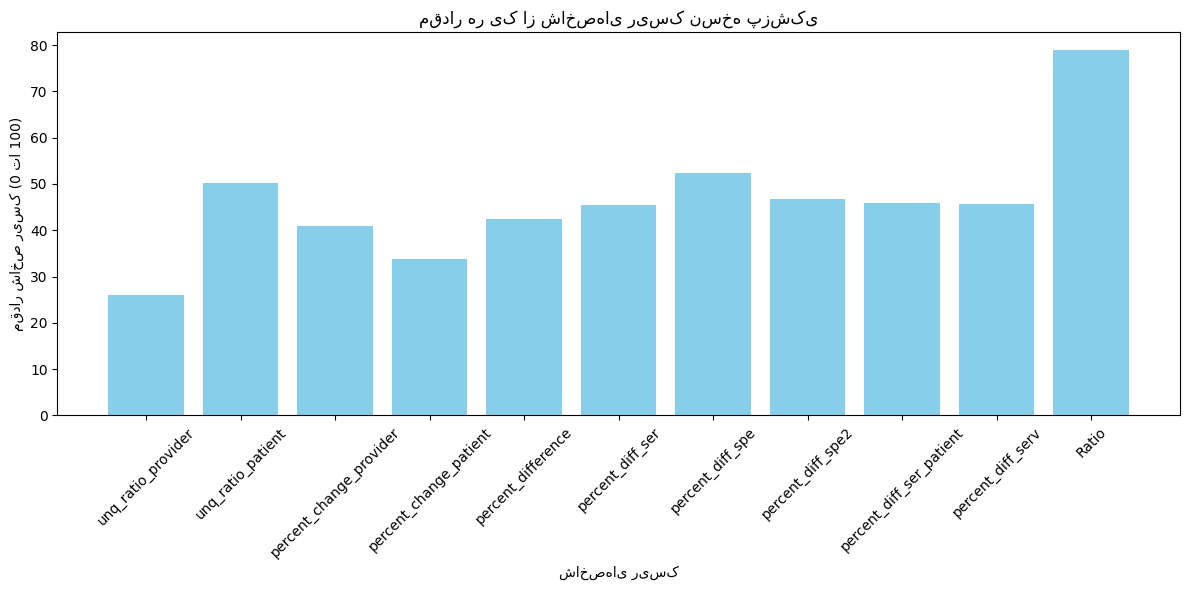

In [373]:
import matplotlib.pyplot as plt

# نام شاخص‌ها
risk_indices = ['unq_ratio_provider','unq_ratio_patient','percent_change_provider',
                'percent_change_patient','percent_difference','percent_diff_ser',
                'percent_diff_spe','percent_diff_spe2','percent_diff_ser_patient',
                'percent_diff_serv', 'Ratio']

# مقادیر ریسک در قالب آرایه
#risk_values = [75, 50, 90, 30, 60, 80, 45, 70, 55, 85, 40]  # نمونه مقادیر ریسک

# رسم نمودار ستونی
plt.figure(figsize=(12, 6))
plt.bar(risk_indices, scaled_new_sample_1d, color='skyblue')

# تنظیمات نمودار
plt.xlabel('شاخص‌های ریسک')
plt.ylabel('مقدار شاخص ریسک (0 تا 100)')
plt.title('مقدار هر یک از شاخص‌های ریسک نسخه پزشکی')
plt.xticks(rotation=45)  # چرخش برچسب‌ها برای خوانایی بهتر
plt.tight_layout()
plt.show()

# Section (5): Report of Prediction Results for traning data frame

In [376]:
# Converting a training dataframe into a risk dataframe

import pandas as pd
import scipy.stats as stats

# نرمال‌سازی به روش z-نرمال
data_final_zscore = (data_final - data_final.mean()) / data_final.std()

prob_data_final_zscore = data_final_zscore.apply(lambda col: stats.norm.cdf(col))

#print(full_data_zscore.loc[352785: , ])  
prob_data_final_zscore.head()
#print(prob_full_data_zscore.loc[352785: ], ) 

,unq_ratio_provider,unq_ratio_patient,percent_change_provider,percent_change_patient,percent_difference,percent_diff_ser,percent_diff_spe,percent_diff_spe2,percent_diff_ser_patient,percent_diff_serv,Ratio
0,0.366981,0.257043,0.38155,0.339,0.931196,0.450519,0.46864,0.466781,0.446114,0.44489,0.079325
1,0.878731,0.972232,0.38155,0.339,0.400192,0.450519,0.46864,0.466781,0.446114,0.44489,0.079325
2,0.833360,0.347977,0.38155,0.339,0.905071,0.450519,0.46864,0.466781,0.446114,0.44489,0.913636
3,0.260578,0.257043,0.38155,0.339,0.537387,0.450519,0.46864,0.466781,0.446114,0.44489,0.717170
4,0.714050,0.736008,0.38155,0.339,0.400192,0.450519,0.46864,0.466781,0.446114,0.44489,0.749736


In [377]:
# adding the required field to the risk dataframe
prob_data_final_zscore['provider_name'] = data['provider_name']
prob_data_final_zscore['Adm_date'] = data['Adm_date']
prob_data_final_zscore['ID'] = data['ID']

# Display of Providers & Patients risk indicators for Training Data

In [321]:
#features_provider = ['unq_ratio_patient','percent_change_provider','percent_difference','percent_diff_ser',
#'percent_diff_spe','percent_diff_spe2','percent_diff_serv', 'Ratio']

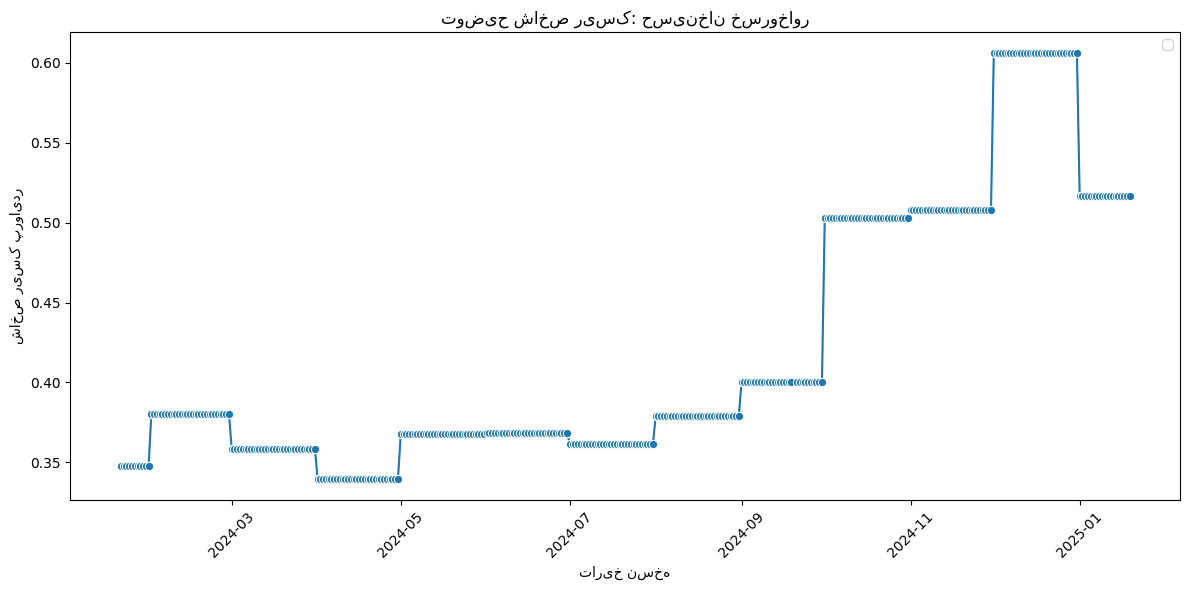

In [378]:
#Display of Providers risk indicators for Training Data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# نام پزشک مورد نظر خود را وارد کنید
provider_to_plot = 'حسینخان خسروخاور'
Provider_risk_indicator = 'unq_ratio_patient'

# فیلتر کردن رکوردهای مربوط به پزشک مورد نظر
prob_data_final_zscore = prob_data_final_zscore[prob_data_final_zscore['provider_name'] == provider_to_plot]

# تبدیل ستون تاریخ به datetime
prob_data_final_zscore['Adm_date'] = pd.to_datetime(prob_data_final_zscore['Adm_date'])

# رسم نمودار خطی
plt.figure(figsize=(12,6))
sns.lineplot(data=prob_data_final_zscore, x='Adm_date', y=Provider_risk_indicator, marker='o')

# افزودن خط قرمز در محل مورد نظر (در صورت نیاز)
# critical_value = 0.45  # مقدار بحرانی
# plt.axhline(y=critical_value, color='red', linestyle='--', linewidth=2, label='خط بحرانی')

# افزودن برچسب‌ها و عنوان
plt.legend()
plt.title(f'توضیح شاخص ریسک: {provider_to_plot}')
plt.xlabel('تاریخ نسخه')
plt.ylabel('شاخص ریسک پروایدر')
plt.xticks(rotation=45)  # چرخش تاریخ‌ها
plt.tight_layout()
plt.show()

In [ ]:

#features_patient = ['unq_ratio_provider','percent_change_patient','percent_difference', 'percent_diff_ser_patient']

In [ ]:
# Display of Patients risk indicators for Training Data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# نام پزشک مورد نظر خود را وارد کنید
patient_to_plot = '50183'
Patient_risk_indicator = 'unq_ratio_patient'

# فیلتر کردن رکوردهای مربوط به پزشک مورد نظر
prob_data_final_zscore = prob_data_final_zscore[prob_data_final_zscore['ID'] == patient_to_plot]

# تبدیل ستون تاریخ به datetime
prob_data_final_zscore['Adm_date'] = pd.to_datetime(prob_data_final_zscore['Adm_date'])

# رسم نمودار خطی
plt.figure(figsize=(12,6))
sns.lineplot(data=prob_data_final_zscore, x='Adm_date', y=Patient_risk_indicator, marker='o')

# افزودن خط قرمز در محل مورد نظر (در صورت نیاز)
# critical_value = 0.45  # مقدار بحرانی
# plt.axhline(y=critical_value, color='red', linestyle='--', linewidth=2, label='خط بحرانی')

# افزودن برچسب‌ها و عنوان
plt.legend()
plt.title(f'توضیح شاخص ریسک: {provider_to_plot}')
plt.xlabel('تاریخ نسخه')
plt.ylabel('شاخص ریسک بیمار')
plt.xticks(rotation=45)  # چرخش تاریخ‌ها
plt.tight_layout()
plt.show()

# Section (6): Report of Prediction Results 

In [379]:
# افزودن ستون نتایج پیش‌بینی به data_final
data_final['Adm_date'] = data['Adm_date']
data_final['gender'] = data['gender']
data_final['age'] = data['age']
data_final['Service'] = data['Service']
data_final['province'] = data['province']
data_final['پوشش'] = data['پوشش']

data_final['prediction'] = y_pred

data_final.head()

,unq_ratio_provider,unq_ratio_patient,percent_change_provider,percent_change_patient,percent_difference,percent_diff_ser,percent_diff_spe,percent_diff_spe2,percent_diff_ser_patient,percent_diff_serv,Ratio,Adm_date,gender,age,Service,province,پوشش,prediction
0,1.250000,1.000000,0.0,0.0,106.753689,0.0,0.0,0.0,0.0,0.0,0.000000,2024-01-21,زن,39,آزمایشات تشخیصی پزشکی,گیلان,خدمات آزمايشگاهي,1
1,2.500000,3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2024-01-21,زن,51,ویزیت متخصص,اصفهان,انواع ويزيت,1
2,2.333333,1.203883,0.0,0.0,96.078431,0.0,0.0,0.0,0.0,0.0,0.998346,2024-01-21,زن,84,پانسمان,مرکزی,خدمات اورژانس,1
3,1.000000,1.000000,0.0,0.0,21.300370,0.0,0.0,0.0,0.0,0.0,0.714286,2024-01-21,زن,12,ویزیت فوق تخصصی,کرمانشاه,انواع ويزيت,1
4,2.000000,2.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.750000,2024-01-21,مرد,12,دارو و ملزومات دارویی,تهران,دارو و ملزومات دارويي,1


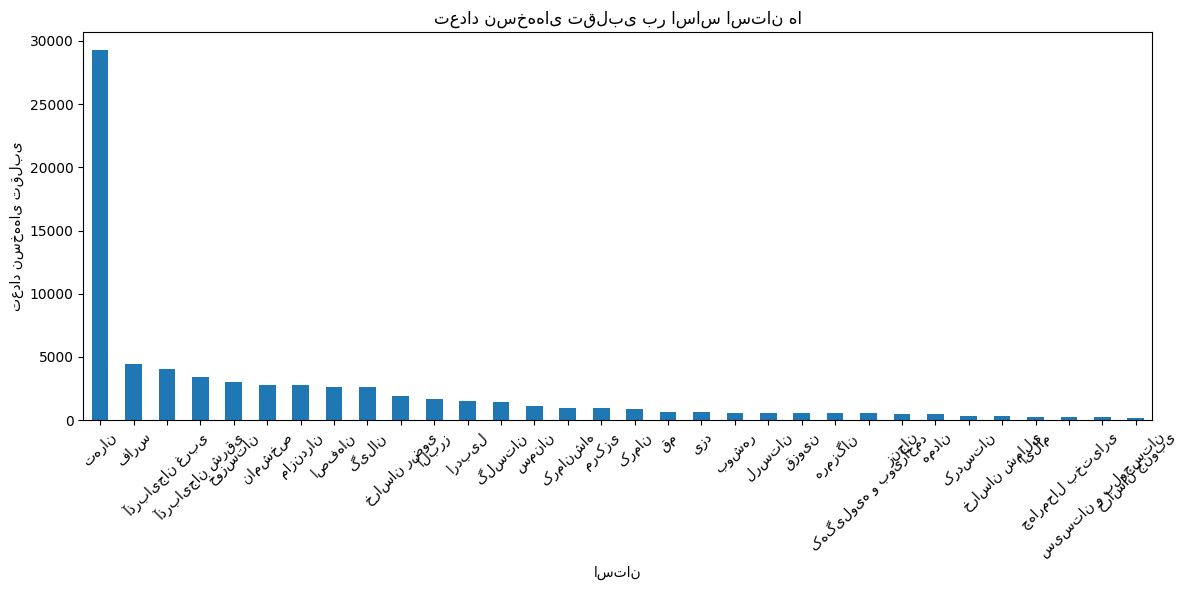

In [380]:
# تعداد نسخه‌های تقلبی بر اساس استان ها

import pandas as pd
import matplotlib.pyplot as plt

# فرض کنید ستون 'province' در final_data وجود دارد
# و می‌خواهید تعداد تقلب‌ها در هر شهر را نشان دهید

# فیلتر کردن رکوردهای تقلبی
fraud_data = data_final[data_final['prediction'] == -1]

# شمارش تعداد تقلب‌ها در هر شهر
fraud_counts_by_city = fraud_data['province'].value_counts()

# رسم نمودار میله‌ای
plt.figure(figsize=(12, 6))
fraud_counts_by_city.plot(kind='bar')
plt.xlabel('استان')
plt.ylabel('تعداد نسخه‌های تقلبی')
plt.title('تعداد نسخه‌های تقلبی بر اساس استان ها')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

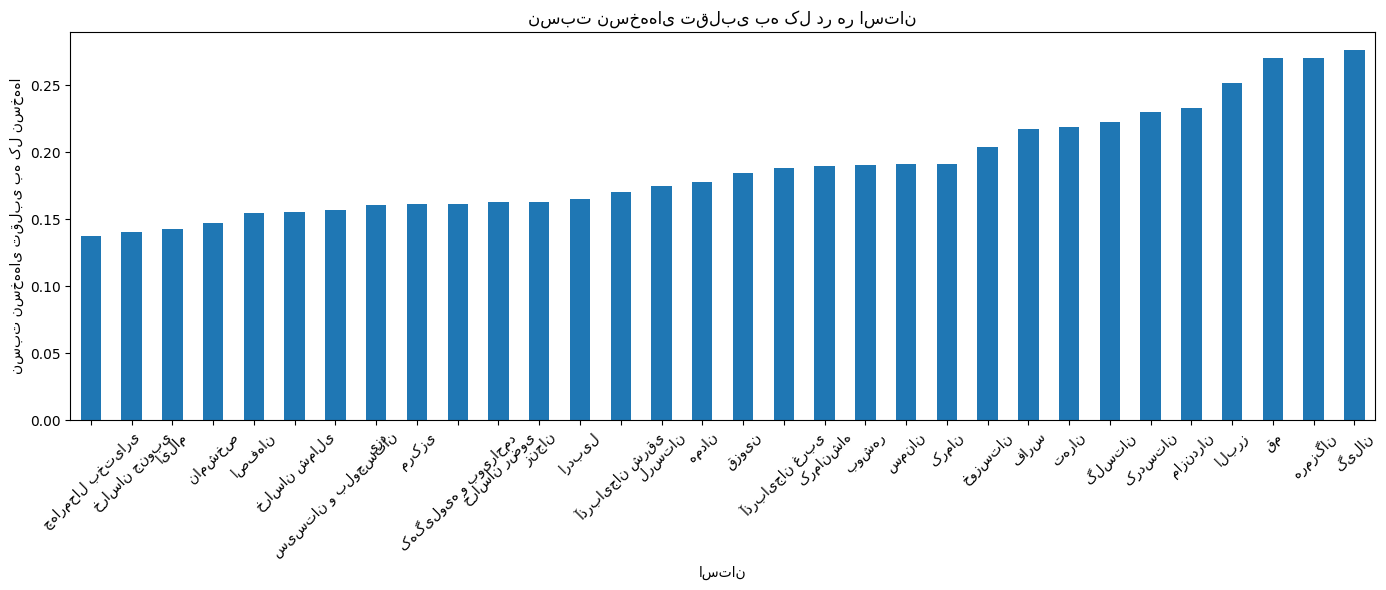

In [381]:
# نسبت نسخه‌های تقلبی به کل نسخه‌ها در استان های مختلف به ترتیب

import pandas as pd
import matplotlib.pyplot as plt

# # شمارش تعداد نسخه‌های تقلبی و نرمال در هر پوشش
counts = data_final.groupby(['province', 'prediction']).size().unstack(fill_value=0)

# اطمینان از وجود ستون‌های نرمال و تقلبی
if 1 not in counts.columns:
    counts[1] = 0
if -1 not in counts.columns:
    counts[-1] = 0

# محاسبه نسبت تعداد نسخه‌های تقلبی به کل نسخه‌ها (نرمال + تقلبی)
counts['fraud_ratio'] = counts.apply(
    lambda row: row[-1] / (row[1] + row[-1]) if (row[1] + row[-1]) != 0 else None,
    axis=1
)

# حذف پوشش‌هایی با جمع نرمال و تقلبی صفر برای جلوگیری از division by zero
ratio_data = counts.dropna(subset=['fraud_ratio'])

# رسم نمودار
plt.figure(figsize=(14, 6))
ratio_data['fraud_ratio'].sort_values().plot(kind='bar')
plt.xlabel('استان')
plt.ylabel('نسبت نسخه‌های تقلبی به کل نسخه‌ها')
plt.title('نسبت نسخه‌های تقلبی به کل در هر استان')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

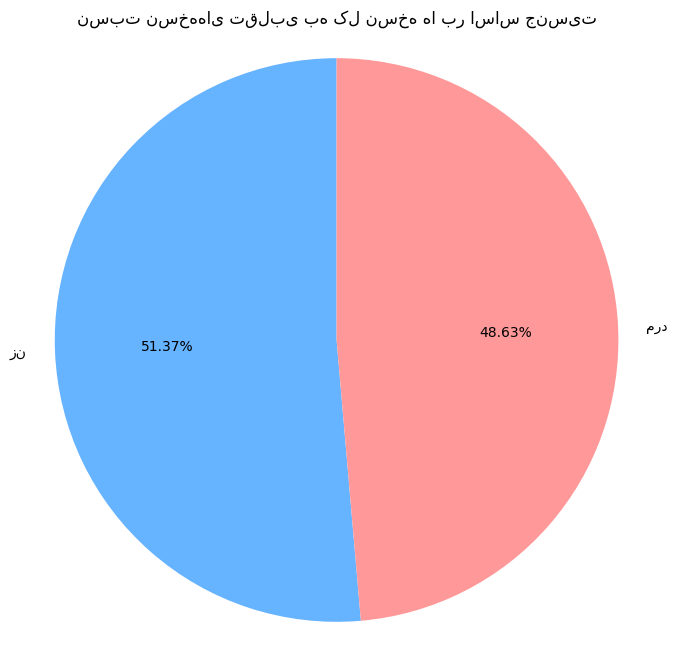

In [382]:
#نسبت نسخه‌های تقلبی به کل نسخه ها بر اساس جنسیت

import pandas as pd
import matplotlib.pyplot as plt

# فرض بر این است که final_data شامل ستون‌های 'gender' و 'prediction' است

# گروه‌بندی بر اساس جنسیت و پیش‌بینی
counts = data_final.groupby(['gender', 'prediction']).size().unstack(fill_value=0)

# اطمینان از موجود بودن ستون‌های نرمال و تقلبی
if 1 not in counts.columns:
    counts[1] = 0
if -1 not in counts.columns:
    counts[-1] = 0

# محاسبه نسبت تقلبی به نرمال برای هر جنسیت
ratios = counts.apply(
    lambda row: row[-1] / (row[1] + row[-1]) if (row[1] + row[-1]) != 0 else 0, axis=1
)

# رسم نمودار دایره‌ای
plt.figure(figsize=(8, 8))
plt.pie(
    ratios,
    labels=ratios.index,
    autopct='%.2f%%',
    startangle=90,
    colors=['#66b3ff','#ff9999']
)
plt.title('نسبت نسخه‌های تقلبی به کل نسخه ها بر اساس جنسیت')
plt.axis('equal')  # برای اینکه دایره کاملاً گرد باشد
plt.show()

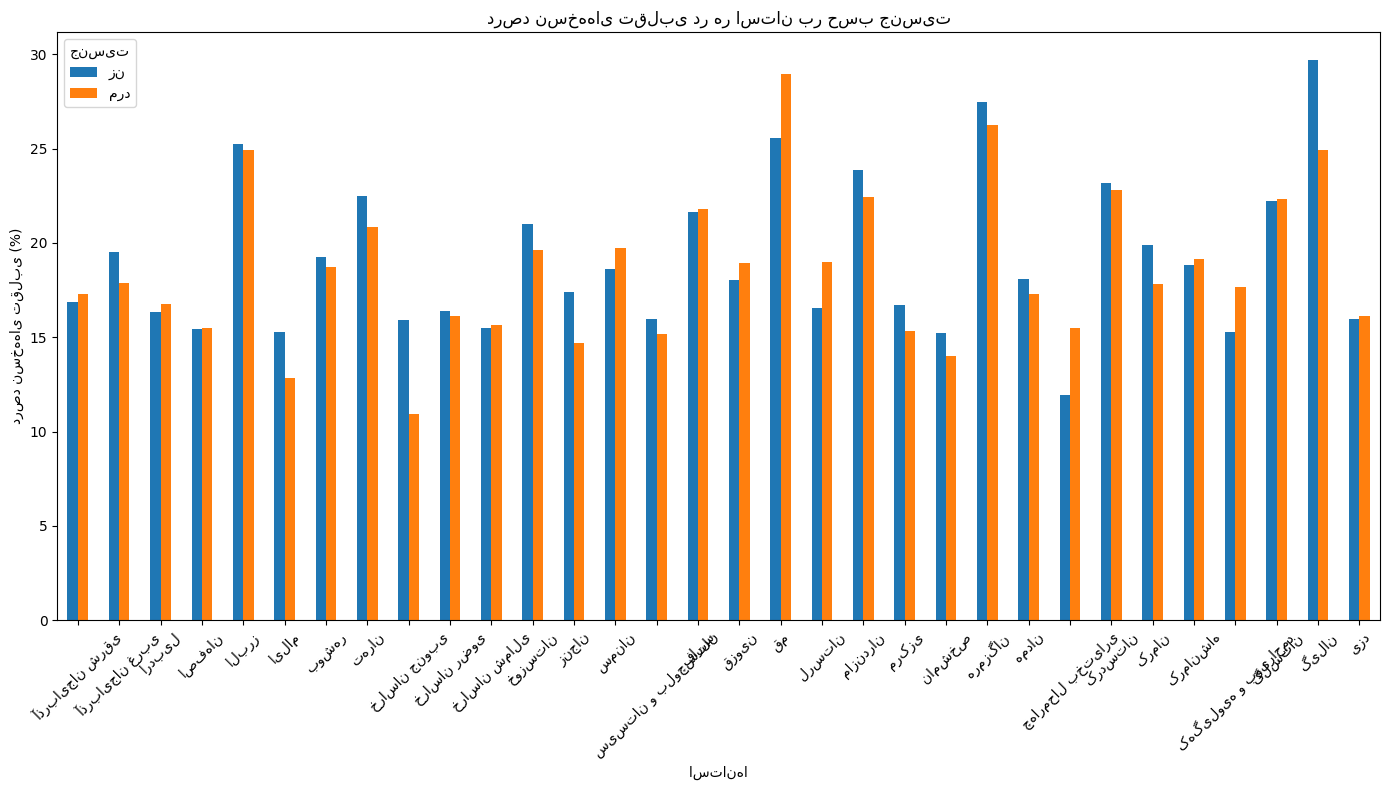

In [383]:
# درصد نسخه‌های تقلبی در هر استان بر حسب جنسیت

import pandas as pd
import matplotlib.pyplot as plt

# فرض بر اینکه final_data شامل ستون‌های 'province', 'gender' و 'prediction' است.

# 1. تعداد کل نسخه‌های هر استان و جنسیت
total_counts = data_final.groupby(['province', 'gender']).size().unstack(fill_value=0)

# 2. تعداد نسخه‌های تقلبی هر استان و جنسیت
fraud_counts = data_final[data_final['prediction'] == -1].groupby(['province', 'gender']).size().unstack(fill_value=0)

# 3. محاسبه درصد تقلبی در هر استان و جنسیت
percentage_fraud = fraud_counts / total_counts * 100

# 4. رسم نمودار
# می‌خواهیم هر استان چند درصد نسخه‌هایش مربوط به تقلبی‌ها بر حسب جنسیت است را نشان دهیم

percentage_fraud.plot(kind='bar', figsize=(14, 8))
plt.title('درصد نسخه‌های تقلبی در هر استان بر حسب جنسیت')
plt.xlabel('استان‌ها')
plt.ylabel('درصد نسخه‌های تقلبی (%)')
plt.xticks(rotation=45)
plt.legend(title='جنسیت')
plt.tight_layout()
plt.show()

In [384]:
import pandas as pd

# فرض کنید ستون 'سن' دارید و می‌خواهید گروه‌های سنی را بر اساس این ستون تعریف کنید

# دامنه‌های سنی و برچسب‌ها، می‌توانید این‌ها را بر حسب نیاز خود تنظیم کنید
bins = [0, 4, 12, 19, 34, 49, 64, 100]
labels = ['نوزادان', 'کودکان', 'نوجوانان', 'جوانان', 'بزرگسالان', 'میانسالان', 'سالمندان']

# افزودن ستون جدید به final_data
data_final['age_group'] = pd.cut(data_final['age'], bins=bins, labels=labels, right=True)

# نمایش چند نمونه
print(data_final[['age', 'age_group']].head())


   age  age_group
0   39  بزرگسالان
1   51  میانسالان
2   84   سالمندان
3   12     کودکان
4   12     کودکان


In [385]:
data_final.head()

,unq_ratio_provider,unq_ratio_patient,percent_change_provider,percent_change_patient,percent_difference,percent_diff_ser,percent_diff_spe,percent_diff_spe2,percent_diff_ser_patient,percent_diff_serv,Ratio,Adm_date,gender,age,Service,province,پوشش,prediction,age_group
0,1.250000,1.000000,0.0,0.0,106.753689,0.0,0.0,0.0,0.0,0.0,0.000000,2024-01-21,زن,39,آزمایشات تشخیصی پزشکی,گیلان,خدمات آزمايشگاهي,1,بزرگسالان
1,2.500000,3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2024-01-21,زن,51,ویزیت متخصص,اصفهان,انواع ويزيت,1,میانسالان
2,2.333333,1.203883,0.0,0.0,96.078431,0.0,0.0,0.0,0.0,0.0,0.998346,2024-01-21,زن,84,پانسمان,مرکزی,خدمات اورژانس,1,سالمندان
3,1.000000,1.000000,0.0,0.0,21.300370,0.0,0.0,0.0,0.0,0.0,0.714286,2024-01-21,زن,12,ویزیت فوق تخصصی,کرمانشاه,انواع ويزيت,1,کودکان
4,2.000000,2.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.750000,2024-01-21,مرد,12,دارو و ملزومات دارویی,تهران,دارو و ملزومات دارويي,1,کودکان


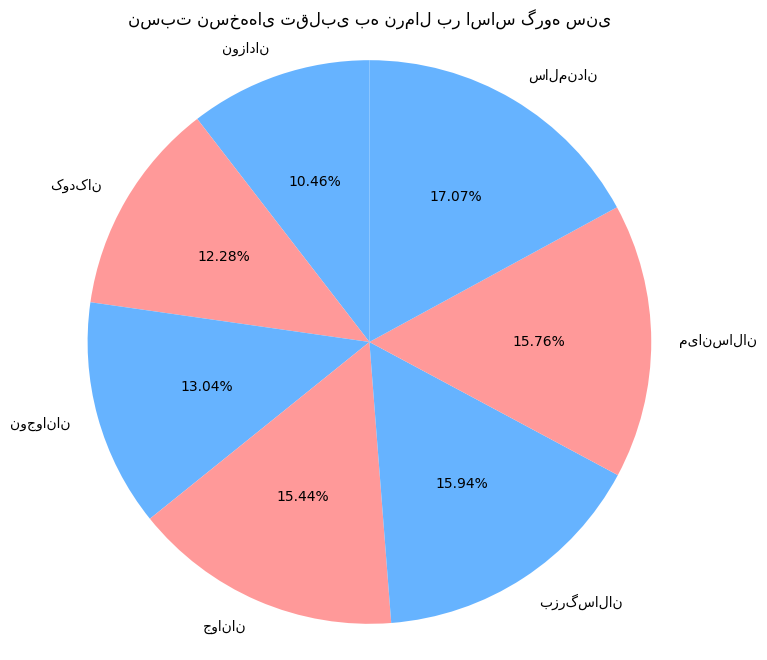

In [386]:
# نسبت نسخه های تقلبی برحسب گروه های سنی 

import pandas as pd

# گروه‌بندی بر اساس جنسیت و پیش‌بینی
counts = data_final.groupby(['age_group', 'prediction']).size().unstack(fill_value=0)

# اطمینان از موجود بودن ستون‌های نرمال و تقلبی
if 1 not in counts.columns:
    counts[1] = 0
if -1 not in counts.columns:
    counts[-1] = 0

# محاسبه نسبت تقلبی به کل نسخه ها برای هر جنسیت
ratios = counts.apply(
    lambda row: row[-1] / (row[1] + row[-1]) if (row[1] + row[-1]) != 0 else 0, axis=1
)

# رسم نمودار دایره‌ای
plt.figure(figsize=(8, 8))
plt.pie(
    ratios,
    labels=ratios.index,
    autopct='%.2f%%',
    startangle=90,
    colors=['#66b3ff','#ff9999']
)
plt.title('نسبت نسخه‌های تقلبی به نرمال بر اساس گروه سنی')
plt.axis('equal')  # برای اینکه دایره کاملاً گرد باشد
plt.show()

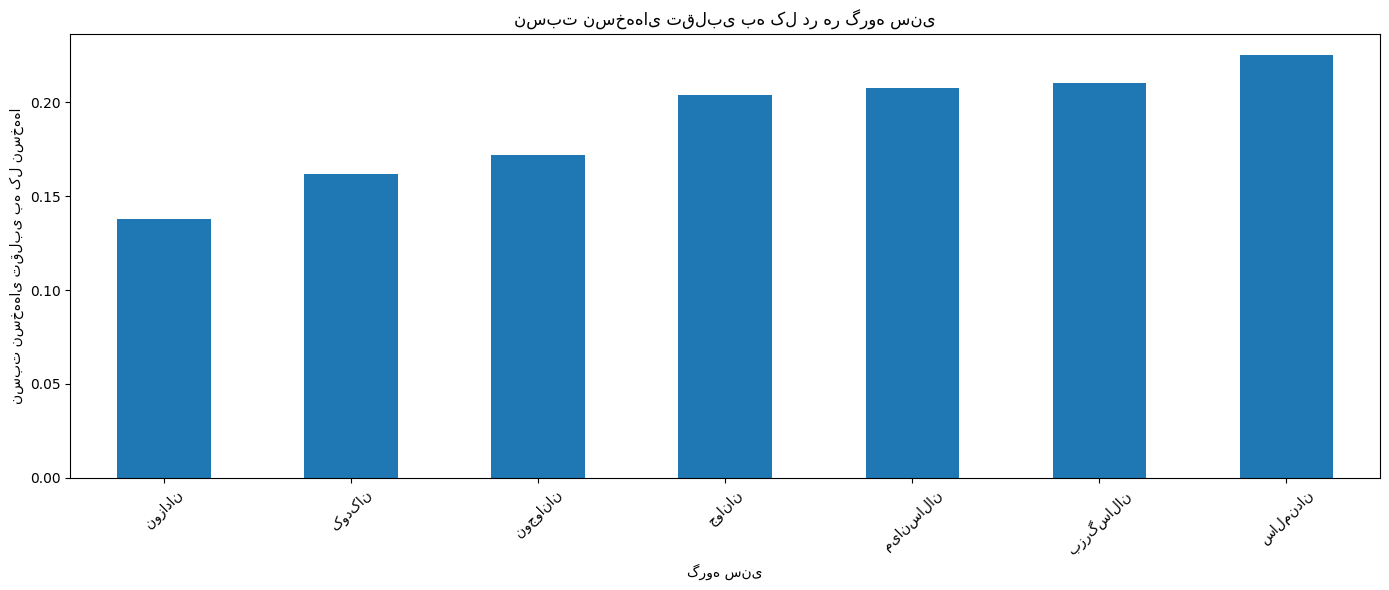

In [387]:
# نسبت نسخه های تقلبی برحسب گروه های سنی 

# شمارش تعداد نسخه‌های تقلبی و نرمال در هر پوشش
counts = data_final.groupby(['age_group', 'prediction']).size().unstack(fill_value=0)

# اطمینان از وجود ستون‌های نرمال و تقلبی
if 1 not in counts.columns:
    counts[1] = 0
if -1 not in counts.columns:
    counts[-1] = 0

# محاسبه نسبت تعداد نسخه‌های تقلبی به کل نسخه‌ها (نرمال + تقلبی)
counts['fraud_ratio'] = counts.apply(
    lambda row: row[-1] / (row[1] + row[-1]) if (row[1] + row[-1]) != 0 else None,
    axis=1
)

# حذف پوشش‌هایی با جمع نرمال و تقلبی صفر برای جلوگیری از division by zero
ratio_data = counts.dropna(subset=['fraud_ratio'])

# رسم نمودار
plt.figure(figsize=(14, 6))
ratio_data['fraud_ratio'].sort_values().plot(kind='bar')
plt.xlabel('گروه سنی')
plt.ylabel('نسبت نسخه‌های تقلبی به کل نسخه‌ها')
plt.title('نسبت نسخه‌های تقلبی به کل در هر گروه سنی')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

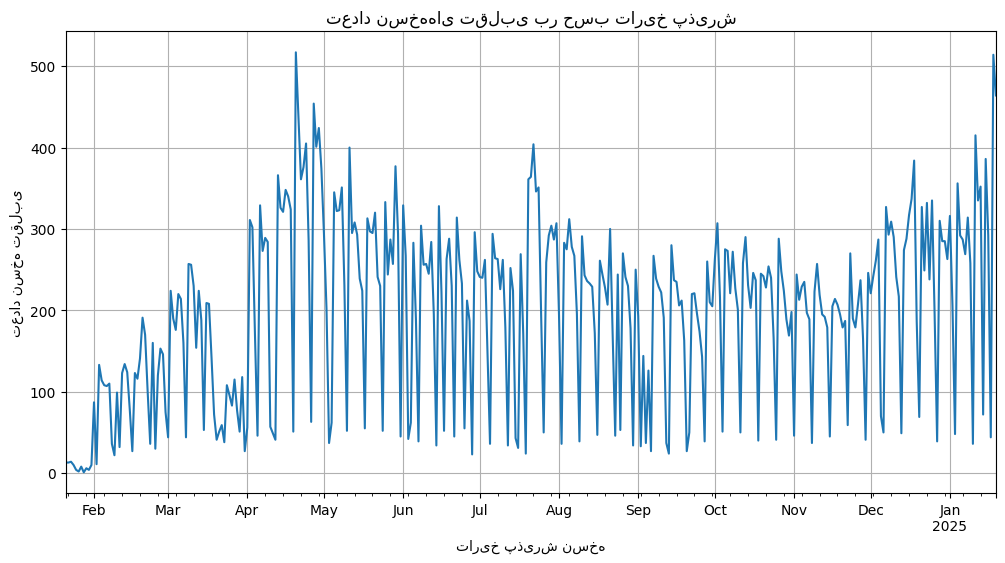

In [388]:
# تعداد نسخه‌های تقلبی بر حسب تاریخ پذیرش

# اگر ستون تاریخ در قالب رشته است، ابتدا به تاریخ تبدیل کنید
# final_data['Adm_date'] = pd.to_datetime(final_data['Adm_date'])

# تعداد نسخه‌های تقلبی در هر تاریخ پذیرش
fraud_by_date = data_final[data_final['prediction'] == -1].groupby('Adm_date').size()

# رسم تعداد نسخه‌های تقلبی بر حسب تاریخ
plt.figure(figsize=(12,6))
fraud_by_date.plot()
plt.xlabel('تاریخ پذیرش نسخه')
plt.ylabel('تعداد نسخه تقلبی')
plt.title('تعداد نسخه‌های تقلبی بر حسب تاریخ پذیرش')
plt.grid(True)
plt.show()

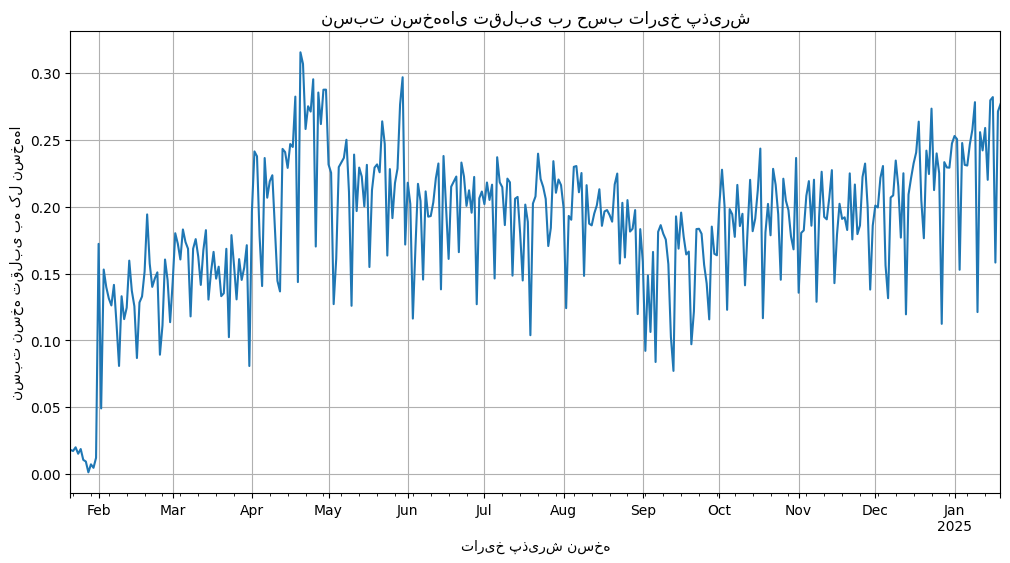

In [389]:
# نسبت نسخه تقلبی به کل نسخه‌ها

import matplotlib.pyplot as plt

# اگر ستون تاریخ در قالب رشته است، آن را به تاریخ تبدیل کنید
data_final['Adm_date'] = pd.to_datetime(data_final['Adm_date'])

# تعداد نسخه‌های تقلبی در هر تاریخ
fraud_counts = data_final[data_final['prediction'] == -1].groupby('Adm_date').size()

# تعداد کل نسخه‌ها در هر تاریخ
total_counts = data_final.groupby('Adm_date').size()

# محاسبه نسبت نسخه‌های تقلبی به کل نسخه‌ها
fraud_ratio = fraud_counts / total_counts

# رسم نسبت روزانه نسخه‌های تقلبی
plt.figure(figsize=(12,6))
fraud_ratio.plot()
plt.xlabel('تاریخ پذیرش نسخه')
plt.ylabel('نسبت نسخه تقلبی به کل نسخه‌ها')
plt.title('نسبت نسخه‌های تقلبی بر حسب تاریخ پذیرش')
plt.grid(True)
plt.show()

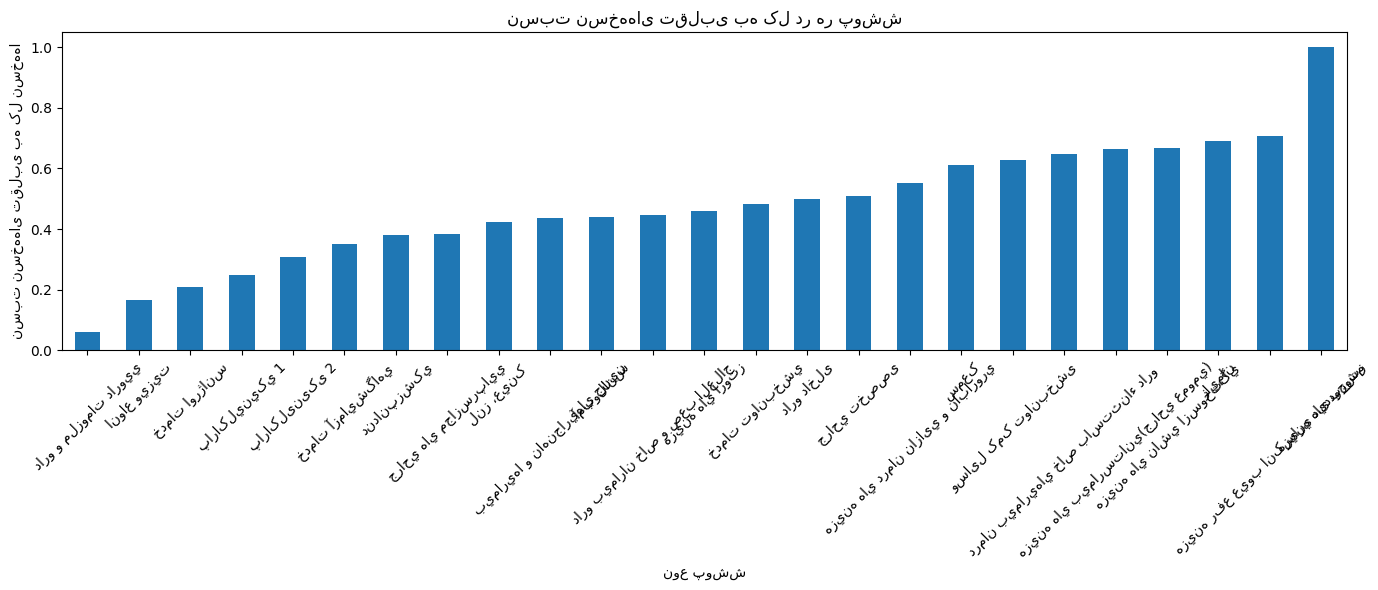

In [390]:
# نسبت نسخه‌های تقلبی در پوشش های مختلف بیمه

# شمارش تعداد نسخه‌های تقلبی و نرمال در هر پوشش
counts = data_final.groupby(['پوشش', 'prediction']).size().unstack(fill_value=0)

# اطمینان از وجود ستون‌های نرمال و تقلبی
if 1 not in counts.columns:
    counts[1] = 0
if -1 not in counts.columns:
    counts[-1] = 0

# محاسبه نسبت تعداد نسخه‌های تقلبی به کل نسخه‌ها (نرمال + تقلبی)
counts['fraud_ratio'] = counts.apply(
    lambda row: row[-1] / (row[1] + row[-1]) if (row[1] + row[-1]) != 0 else None,
    axis=1
)

# حذف پوشش‌هایی با جمع نرمال و تقلبی صفر برای جلوگیری از division by zero
ratio_data = counts.dropna(subset=['fraud_ratio'])

# رسم نمودار
plt.figure(figsize=(14, 6))
ratio_data['fraud_ratio'].sort_values().plot(kind='bar')
plt.xlabel('نوع پوشش')
plt.ylabel('نسبت نسخه‌های تقلبی به کل نسخه‌ها')
plt.title('نسبت نسخه‌های تقلبی به کل در هر پوشش')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()